# 拉勾网数据分析岗位分析

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [239]:
#读取文件数据
df = pd.read_csv('C:/Users/17372/Desktop/data.csv',encoding='gb2312')
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [241]:
#快速查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


## 数据清理

In [22]:
len(df.positionId.unique())

5031

positionId应该是唯一的，我们统计有6876条，但分析唯一值却仅有5031条，说明有重复值

In [23]:
#清理不需要的字段
new_data = df.drop(['companyLabelList','businessZones'],axis=1)
#清理重复值
clean_data = new_data.drop_duplicates(subset='positionId',keep='first')
clean_data.head()

,city,companyFullName,companyId,companyShortName,companySize,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,1号店,2000人以上,技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,点融网,500-2000人,技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,SPD,50-150人,设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,数云,150-500人,市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,银基富力,15-50人,技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


因为拉勾网中的薪资是一个区间值，所以我们取其平均值作为薪酬值

In [32]:
def average(salary):
    try:
        s_list = salary.split('-')
        min_salary = int(s_list[0][:-1])
        max_salary = int(s_list[1][:-1])
        average_salary = (min_salary+max_salary)/2
    except ValueError:
        s_list = salary.split('k')
        average_salary = int(s_list[0])
    return average_salary
clean_data['average_salary'] = clean_data['salary'].apply(average)
clean_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,city,companyFullName,companyId,companyShortName,companySize,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear,average_salary
0,上海,纽海信息技术(上海)有限公司,8581,1号店,2000人以上,技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生,8.0
1,上海,上海点荣金融信息服务有限责任公司,23177,点融网,500-2000人,技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生,12.5
2,上海,上海晶樵网络信息技术有限公司,57561,SPD,50-150人,设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生,5.0
3,上海,杭州数云信息技术有限公司上海分公司,7502,数云,150-500人,市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生,7.0
4,上海,上海银基富力信息技术有限公司,130876,银基富力,15-50人,技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生,2.5


### 地域性分析

<BarContainer object of 13 artists>

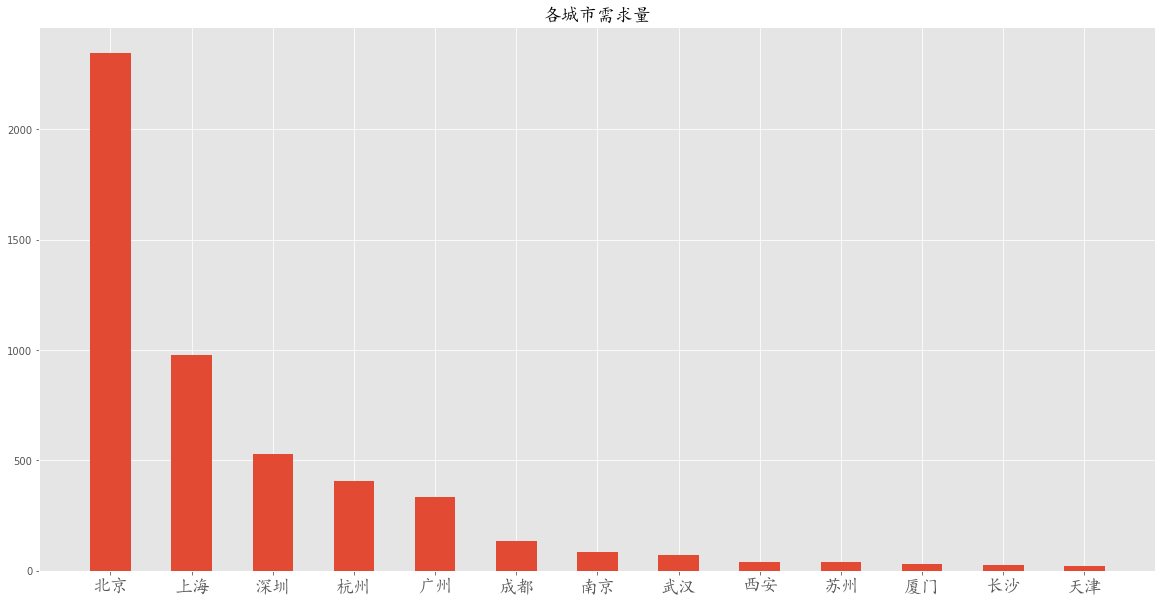

In [87]:
font = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/simkai.ttf',size=18)
font_small = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/simkai.ttf',size=12)
count_by_city = clean_data.groupby('city').positionId.count().sort_values(ascending=False)
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.set_xticklabels(count_by_city.index,fontproperties=font)
rect = ax.bar(count_by_city.index,count_by_city.values,width=0.5)
ax.set_title('各城市需求量',fontproperties=font)
rect

分析图表可知，全国需求量最大的是北京，排在前五分别是：北京，上海，深圳，杭州，广州。<br>
数据分析师这个职业大量需求都集中在北上广深四大一线城市以及杭州这个互联网和电子商务的聚集地，不过北京的需求量绝对是傲视所有其他的城市，这可能是大量互联网公司都集中在北京的原因<br>
总而言之，想从事数据分析行业还是去前五的城市较好。

### 工作经验需求分析

Text(0.5,1,'工作经验分布')

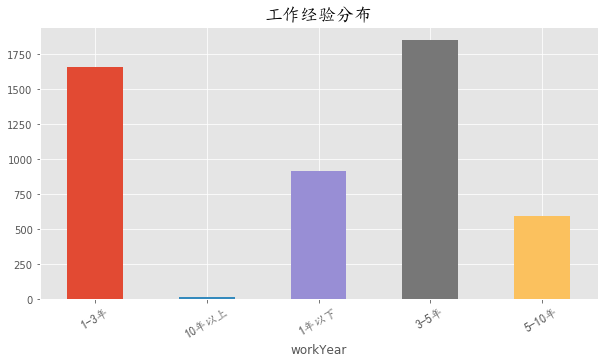

In [165]:
# 根据实际情况，将'应届毕业生'和'不限'改为'1年以下'
clean_data['workYear'] = clean_data.workYear.replace(['应届毕业生','不限'],'1年以下')
count_by_exp = clean_data.groupby('workYear').positionId.count().plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=30,fontproperties=font_small)
plt.title('工作经验分布',fontproperties=font)

分析图表可知，工作3-5年的需求量最大，1-3年紧接其后，10年以上的需求量非常稀少<br>
由此我们可以推测：<br>
1. 数据分析是个较为新兴的行业，大量的工作需求量集中在1-3年以及3-5年。
2. 而且我们发现5年会是一个关键时期，所以需要学习更多的知识提高自己的市场竞争力。

### 总薪酬分布

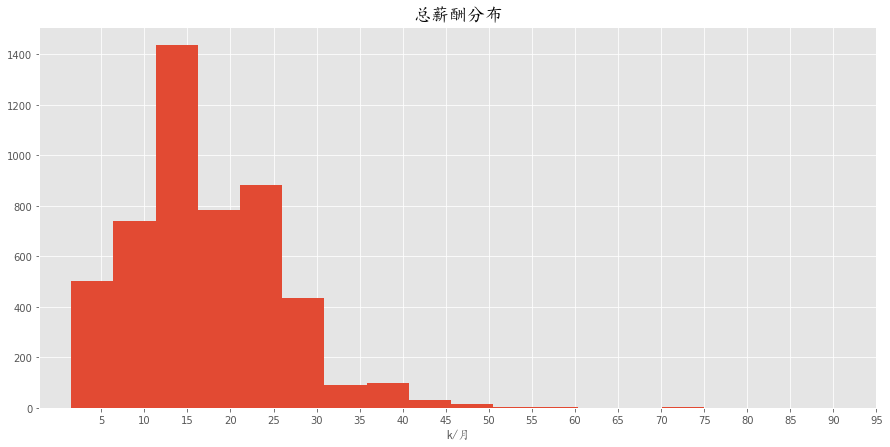

In [106]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)
rect = ax.hist(clean_data['average_salary'],bins=15)
ax.set_title('总薪酬分布',fontproperties=font)
ax.set_xlabel('k/月',fontproperties=font_small)
ax.set_xticks(range(5,100,5))

分析可得，大部分人的薪资范围在5k-25k之间，其中分布最集中的是10k-15k之间的，因为我是取其中间值来进行分析的，所以实际薪资会比结果要高.<br>
综合来看，数据分析师这个职业是一个不错的选择。

## 综合分析

### 各个城市薪酬分布情况

Text(0,0.5,'k/月')

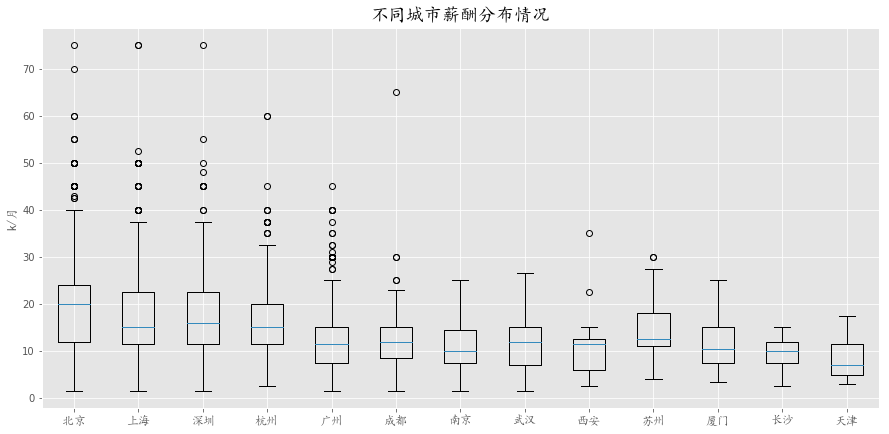

In [237]:
count_by_city_salary = clean_data.groupby('city').average_salary
df1 = []
for group in count_by_city.index:
    a = count_by_city_salary.get_group(group).values
    df1.append(a)
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)
rect = ax.boxplot(df1)
ax.set_xticklabels(count_by_city.index,fontproperties=font_small)
ax.set_title('不同城市薪酬分布情况',fontproperties=font)
ax.set_ylabel('k/月',fontproperties=font_small)

从图上看，薪酬分布和之前总的薪酬分布情况较为一致，北京市数据分析师薪资中位数达到20k,居全国首位，其次是深圳，上海，杭州。另外广州作为一个一线城市在数据分析方面的需求甚至不如成都，武汉，可以看出广州对于数据分析的需求不高。

### 不同工作经验薪酬分布情况

[Text(0,0,'1-3年'),
 Text(0,0,'10年以上'),
 Text(0,0,'1年以下'),
 Text(0,0,'3-5年'),
 Text(0,0,'5-10年')]

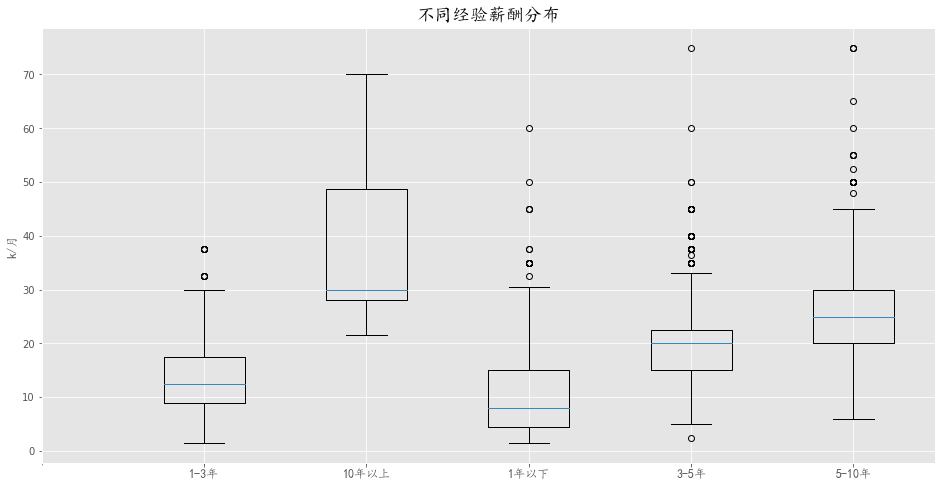

In [236]:
count_by_year = clean_data.groupby('workYear').positionId.count()
count_by_exp_salary = clean_data.groupby('workYear').average_salary

#提取出薪酬值并存入列表中
df2 = []
for name,group in count_by_exp_salary:
    df2.append(group.values)

fig = plt.figure(figsize=(16,8))
ax = plt.subplot(111)
rect = ax.boxplot(df2)
label = ['1年以下','1-3年','3-5年','5-10年','10年以上']
ax.set_title('不同经验薪酬分布',fontproperties=font)
ax.set_ylabel('k/月',fontproperties=font_small)
ax.set_xticks(np.arange(len(label)),label)
ax.set_xticklabels(count_by_year.index,fontproperties=font_small)

分析图表可知，随着经验的增加，薪酬水平也越来越高，在10年内不会因为年龄的增长而导致收入下降。

### 不同城市对学历要求的分析

Text(0.5,1,'不同城市对学历的需求')

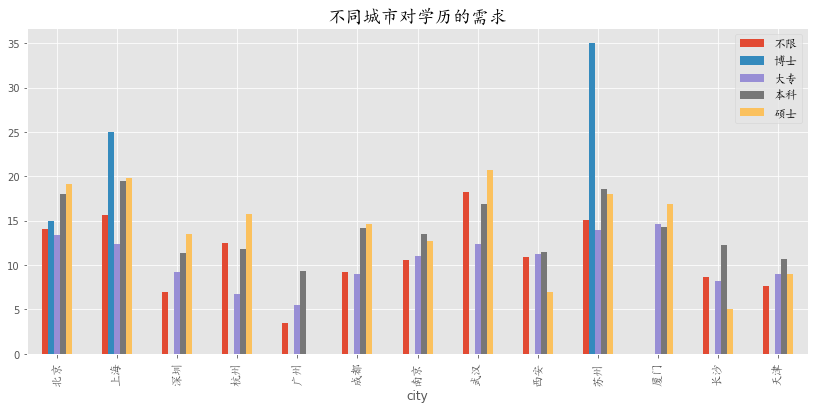

In [263]:
ax = clean_data.groupby(['city','education']).average_salary.mean().unstack().plot.bar(figsize=(14,6))
ax.set_xticklabels(count_by_city.index,fontproperties=font_small)
ax.legend(prop = font_small)
ax.set_title('不同城市对学历的需求',fontproperties=font)

分析图表可知，苏州对博士学历有要求的公司最多，上海其次，北京第三，发现其他城市没有发现博士学历要求的，可能是样本较少，又或者说明这是一个较为新兴的行业，对学历的要求主要集中在本科以及硕士上，大专的竞争力较弱。

## 结论

通过以上的分析，我们可以得知：<br>
1. 数据分析的岗位主要集中在北上广深以及杭州。
2. 数据分析是一个新兴的行业，工作经验集中在1-5年内。
3. 从待遇上看，大部分数据分析师的薪酬集中在5k-25k之间，只有少数人薪酬极高，综合起来看，想从事数据分析行业的最好选择北京，深圳这两个城市。
4. 经验的提升，数据分析师的薪水也在不断提高，10年工作经验的人的薪酬极高。
5. 对于学历而言，对博士学历的需求欲望最低，学历要求普遍集中在本科以及硕士，另外大专的需求较弱，竞争力不强。